In [2]:
import numpy as np
#import cv2
import matplotlib.pyplot as plt

## Read image as in task 1

In [5]:
def readpgm(name):
    with open(name) as f:
         lines = f.readlines()

    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    assert lines[0].strip() == 'P2' 

    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])

data = readpgm('lena256_PGM.pgm')
img_data = np.reshape(data[0],data[1])

## Linear

### Piecewise-Linear Transformation

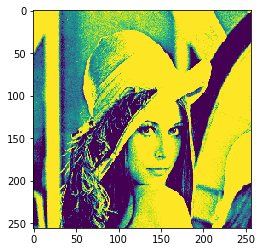

In [6]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

#img = cv2.imread('lena_output.pgm') 
img = img_data

r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
pixelVal_vec = np.vectorize(pixelVal) 
  
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 

In [7]:
width = img_data.shape[0]
height = img_data.shape[1]
arr = contrast_stretched

filename = 'lena_output_contrast_stretch.pgm'
fout=open(filename, 'wb')

pgmHeader = 'P2' + ' ' + str(width) + ' ' + str(height) + ' ' + str(255) +  '\n'

pgmHeader_byte = bytearray(pgmHeader,'utf-8')

fout.write(pgmHeader_byte)

img = np.reshape(arr,(height,width))

for j in range(height):
    bnd = list(img[j,:])
    bnd_str = np.char.mod('%d',bnd)
    bnd_str = np.append(bnd_str,'\n')
    bnd_str = [' '.join(bnd_str)][0]    
    bnd_byte = bytearray(bnd_str,'utf-8')        
    fout.write(bnd_byte)

fout.close()

## Non-Linear

### Log Transformation

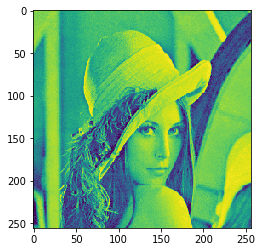

In [8]:
img = img_data
  
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
log_transformed = np.array(log_transformed, dtype = np.uint8)
plt.imshow(log_transformed)

In [9]:
width = img_data.shape[0]
height = img_data.shape[1]
arr = log_transformed

filename = 'lena_output_log_transform.pgm'
fout=open(filename, 'wb')

pgmHeader = 'P2' + ' ' + str(width) + ' ' + str(height) + ' ' + str(255) +  '\n'

pgmHeader_byte = bytearray(pgmHeader,'utf-8')

fout.write(pgmHeader_byte)

img = np.reshape(arr,(height,width))

for j in range(height):
    bnd = list(img[j,:])
    bnd_str = np.char.mod('%d',bnd)
    bnd_str = np.append(bnd_str,'\n')
    bnd_str = [' '.join(bnd_str)][0]    
    bnd_byte = bytearray(bnd_str,'utf-8')        
    fout.write(bnd_byte)

fout.close()

### Power-Law (Gamma) Transformation

In [10]:
img = img_data
  
for gamma in [0.1, 0.5, 1.2, 2.2]: 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
    width = img_data.shape[0]
    height = img_data.shape[1]
    arr = gamma_corrected

    filename = f'lena_output_gamma{gamma}.pgm'
    fout=open(filename, 'wb')

    pgmHeader = 'P2' + ' ' + str(width) + ' ' + str(height) + ' ' + str(255) +  '\n'

    pgmHeader_byte = bytearray(pgmHeader,'utf-8')

    fout.write(pgmHeader_byte)

    img = np.reshape(arr,(height,width))

    for j in range(height):
        bnd = list(img[j,:])
        bnd_str = np.char.mod('%d',bnd)
        bnd_str = np.append(bnd_str,'\n')
        bnd_str = [' '.join(bnd_str)][0]    
        bnd_byte = bytearray(bnd_str,'utf-8')        
        fout.write(bnd_byte)

    fout.close()

## Histogram

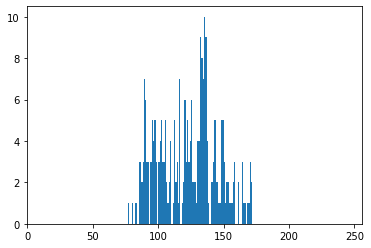

In [15]:
im = img_data
vals = im.mean(axis=0).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.show()